# Import libraries and setup matplotlib

In [1]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = '0'

import warnings
warnings.filterwarnings("ignore")

import sys
sys.path.append('waveglow/')

import matplotlib.pyplot as plt
%matplotlib inline

import IPython.display as ipd
from text import *
import torch
import hparams as hp
from modules.model import Model
from denoiser import Denoiser
from utils.utils import *
from utils.text2seq import text2seq

In [ ]:
'''
waveglow_path = '-DEV/pretrained/waveglow_256channels.pt'
waveglow = torch.load(waveglow_path)['model']

for m in waveglow.modules():
    if 'Conv' in str(type(m)):
        setattr(m, 'padding_mode', 'zeros')

waveglow.cuda().eval()
for k in waveglow.convinv:
    k.float()
    
denoiser = Denoiser(waveglow)
'''

# Generate samples

In [2]:
def visualize(mel):
    plt.figure(figsize = (10, 5))
    plt.imshow(mel)
    plt.show()

In [3]:
vocoder = torch.hub.load('seungwonpark/melgan', 'melgan')
vocoder.eval()

Using cache found in /home/rendchevi/.cache/torch/hub/seungwonpark_melgan_master


f01-328: interupsi yang riuh dan panas langsung bertaburan begitu pemimpin sidang kusdarto memulai sidang.


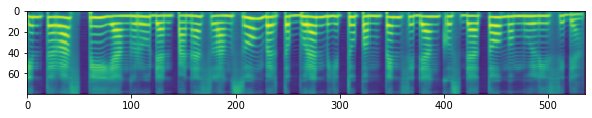

f01-099: reaksi yang sama juga terjadi ketika polri berhasil menangkap tazul arifin pelaku pembacokan matori abdul jalil.


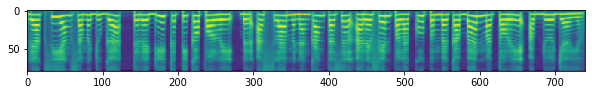

f01-089: hal senada juga muncul dari menteri luar negeri alexander downer.


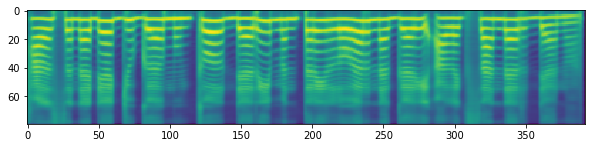

f01-222: bush juga mengumumkan bahwa tiga lembaga perdagangan dan keuangan amerika sepakat untuk memperomosikan pembangunan di indonesia.


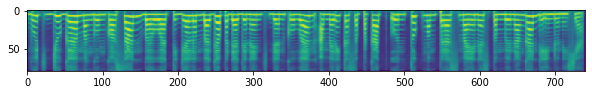

f01-193: waljhi sumatra utara mencemaskan tiga tahun ke depan kawasan ini akan dilanda kehancuran.


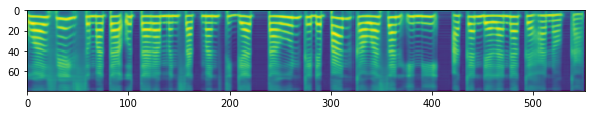

f01-109: bom rakitan ditemukan menyangkut di roda belakang kanan mobil timor b satu lima bq yang dikemudikan fx mario adiora.


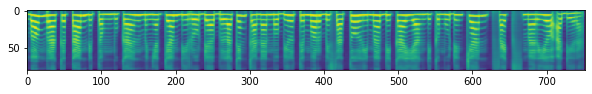

f01-276: amazon explorer hanya mampu memuat lima ratus dua puluh satu ribu sembilan ratus barrel.


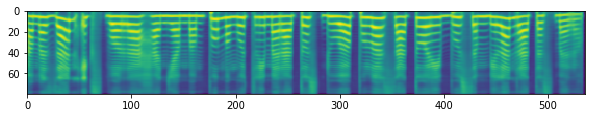

f01-056: rektor universitas muhammadiyah malang muhadjir effendi mengatakan pembentukan komisi konstitusi hanya akan mendegradasikan lembaga legislatif.


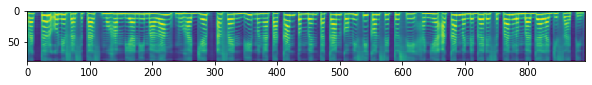

f01-250: "osama bin laden kini bersembunyi di provinsi afganistan tengah, oruzgan."


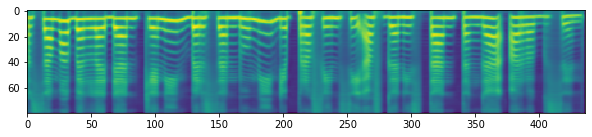

f01-012: makasih atas bantuannya sebulan lalu.


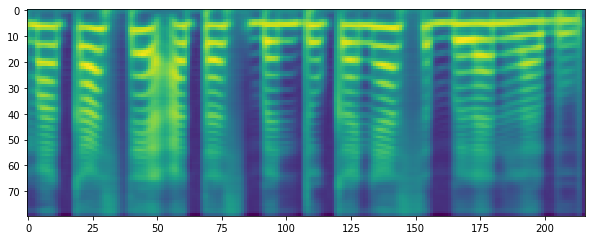

In [4]:
checkpoint_path = "DEV/checkpoints/TITML-IDN-F01/logs_A2/checkpoint_10000"

model = Model(hp).cpu()
model.load_state_dict(torch.load(checkpoint_path)['state_dict'])
_ = model.cpu().eval()

with open('DEV/filelists/TITML-IDN-F01-valfiles.txt', 'r') as f:
    test_data = f.read().splitlines()
    
for i, x in enumerate(test_data[:10]):
    file, text = x.split('|')
    print(f"{file}: {text}")
    phone_seq = text2seq(text)
    sequence = torch.autograd.Variable(torch.from_numpy(phone_seq)).cpu().long().unsqueeze(0)

    temperature=[0.333, 0.333, 0.333, 0.333]
    with torch.no_grad():
        melspec, durations = model.inference(sequence, alpha=1.0, temperature=temperature)
        melspec = melspec*(hp.max_db-hp.min_db)+hp.min_db
        
        audio = vocoder.inference(melspec.cpu())
        
        visualize(melspec.cpu().numpy()[0])
        ipd.display(ipd.Audio(audio.cpu().numpy(), rate=22050))

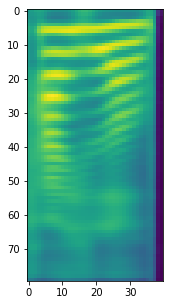

In [11]:
text = 'Halo'
phone_seq = text2seq(text)
sequence = torch.autograd.Variable(torch.from_numpy(phone_seq)).cpu().long().unsqueeze(0)

temperature=[0.333, 0.333, 0.333, 0.333]

with torch.no_grad():
    melspec, durations = model.inference(sequence, alpha=1.0, temperature=temperature)
    melspec = melspec*(hp.max_db-hp.min_db)+hp.min_db
        
    audio = vocoder.inference(melspec.cpu())
        
    visualize(melspec.cpu().numpy()[0])
    ipd.display(ipd.Audio(audio.cpu().numpy(), rate=22050))